Carregando Arquivo de teste


/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60000) reached and the optimization hasn't converged yet.
  warnings.warn(


Treinando RNA - Arquitetura 500 - Execução 1


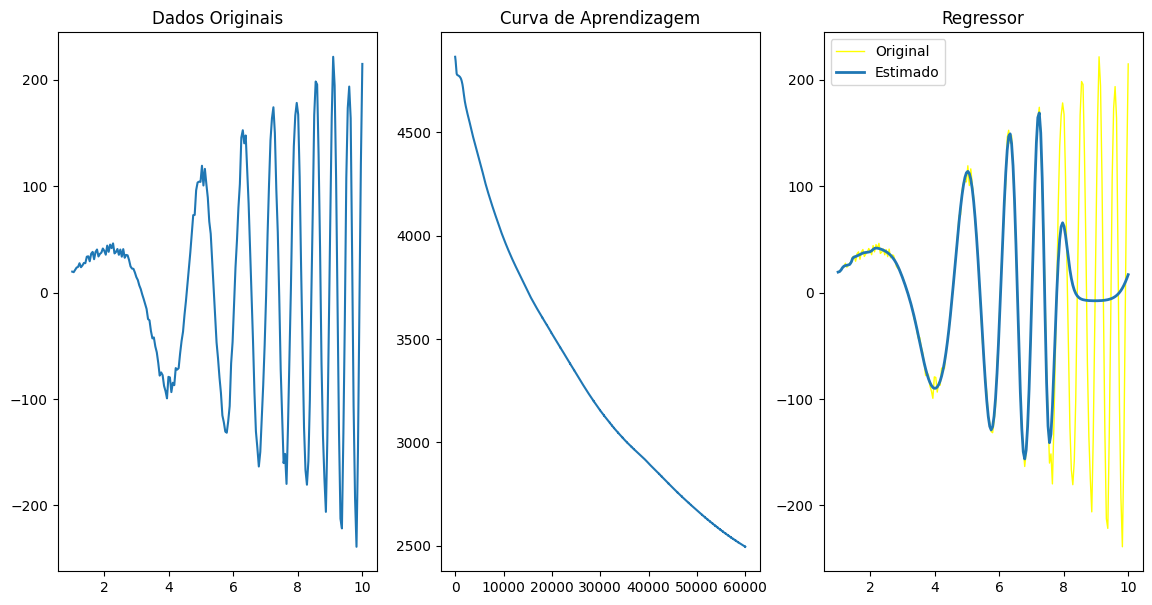

Arquitetura 500: Média do erro = 4987.6810, Desvio padrão = 0.0000


/home/rodrigo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60000) reached and the optimization hasn't converged yet.
  warnings.warn(


Treinando RNA - Arquitetura 1000 - Execução 1


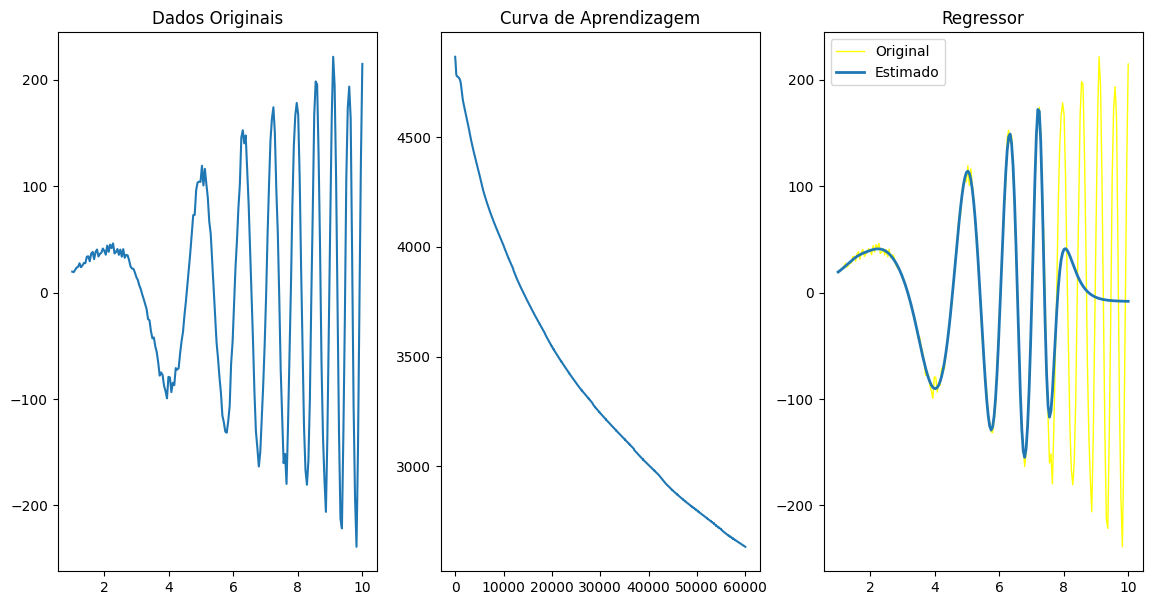

Arquitetura 1000: Média do erro = 5267.5144, Desvio padrão = 0.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Carregando o arquivo
print('Carregando Arquivo de teste')
arquivo = np.load('teste5.npy')
x = arquivo[0]
y = np.ravel(arquivo[1])

# Função para rodar simulações
def rodar_simulacao(arquitetura, iteracoes=1):
    erros_finais = []
    
    for i in range(iteracoes):
        # Configurando o MLPRegressor com a arquitetura especificada
        regr = MLPRegressor(hidden_layer_sizes=arquitetura,
                            max_iter=60000,
                            activation='tanh',
                            solver='adam',
                            learning_rate='adaptive',
                            n_iter_no_change=50)
        
        regr = regr.fit(x, y)

        # Realizando a predição
        y_est = regr.predict(x)

        # Calculando o erro (MSE - Mean Squared Error)
        erro = mean_squared_error(y, y_est)
        erros_finais.append(erro)

        if(i == iteracoes - 1):
            print(f'Treinando RNA - Arquitetura {arquitetura} - Execução {i+1}')
            # Plotando os resultados
            plt.figure(figsize=[14, 7])

            # Plotando o curso original
            plt.subplot(1, 3, 1)
            plt.plot(x, y)
            plt.title("Dados Originais")

            # Plotando a curva de aprendizagem
            plt.subplot(1, 3, 2)
            plt.plot(regr.loss_curve_)
            plt.title("Curva de Aprendizagem")

            # Plotando o regressor
            plt.subplot(1, 3, 3)
            plt.plot(x, y, linewidth=1, color='yellow', label="Original")
            plt.plot(x, y_est, linewidth=2, label="Estimado")
            plt.title("Regressor")
            plt.legend()
            plt.show()

    # Calculando a média e desvio padrão dos erros
    media_erro = np.mean(erros_finais)
    desvio_padrao_erro = np.std(erros_finais)
    return media_erro, desvio_padrao_erro

# Definindo arquiteturas diferentes para teste
arquiteturas = [500, 1000]

# Rodando simulações para cada arquitetura
for arquitetura in arquiteturas:
    media, desvio_padrao = rodar_simulacao(arquitetura)
    print(f"Arquitetura {arquitetura}: Média do erro = {media:.4f}, Desvio padrão = {desvio_padrao:.4f}")
